In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import json

# 读取 JSON 配置文件
with open('base_config.json', 'r') as file:
    config = json.load(file)

# 获取 DATA_PATH 变量
DATA_PATH = config['data_path']


df_ta = pd.read_csv(DATA_PATH)
display(df_ta.head())
display(df_ta.info())
display(df_ta.describe())

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

None

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,307973.000000,307973.000000,307973.000000,307973.000000,307973.000000
mean,52.487005,-1.368884,1.356882,1.829063,38.866037
std,1.339011,1.356092,0.815857,0.710477,14.032933
min,49.914488,-7.516225,1.000000,1.000000,10.000000
25%,51.485248,-2.247937,1.000000,1.000000,30.000000
50%,52.225943,-1.349258,1.000000,2.000000,30.000000
75%,53.415517,-0.206810,1.000000,2.000000,50.000000
max,60.598055,1.759398,48.000000,32.000000,70.000000


In [2]:
df_ta["Police_Force"].value_counts()

Metropolitan Police      46789
West Midlands            13509
West Yorkshire           12016
Greater Manchester       11954
Thames Valley            11483
Kent                      9995
Hampshire                 9492
Lancashire                9143
Devon and Cornwall        8804
Sussex                    8548
Essex                     8239
Avon and Somerset         7929
Surrey                    7897
Northumbria               7557
South Yorkshire           7258
Staffordshire             6479
Merseyside                6373
Cheshire                  6288
Nottinghamshire           6223
West Mercia               5995
Derbyshire                5818
South Wales               5685
Hertfordshire             5493
Leicestershire            5326
Cambridgeshire            5219
Humberside                5024
Lincolnshire              4780
Strathclyde               4635
North Yorkshire           4451
Dorset                    3998
Suffolk                   3759
Norfolk                   3758
North Wa

In [3]:
df_ta["Local_Authority_(District)"].value_counts()

Birmingham            6165
Leeds                 4140
Manchester            3132
Bradford              3006
Westminster           2811
                      ... 
Chester-le-Street       25
Alnwick                 20
South Shropshire        18
Teesdale                15
Berwick-upon-Tweed      13
Name: Local_Authority_(District), Length: 422, dtype: int64

In [4]:
import plotly.express as px
import plotly.offline as pyo

# 使用 Plotly Express 创建地图
fig = px.scatter_geo(
    df_ta[df_ta["Accident Date"] == "1/5/2021"],
    lat='Latitude',
    lon='Longitude',  # 在地图上显示地点名称
    color="Police_Force",
    title='Traffic Accidents',
    projection='natural earth'  # 选择地图投影类型
)

# 显示地图
fig.show()


pyo.plot(fig, filename='my_plotly_chart.html', auto_open=True)

'my_plotly_chart.html'

In [5]:
df_mp = df_ta[df_ta["Police_Force"] == "Metropolitan Police"]
df_mp["Accident Date"] = pd.to_datetime(df_mp["Accident Date"])
df_mp_dayly_count = df_mp.groupby("Accident Date").count()["Accident_Index"]

df_mp_dayly_count = df_mp_dayly_count.reset_index().rename({"Accident_Index": "counts"}, axis=1)
fig = px.line(
    df_mp_dayly_count,
    x='Accident Date',
    y='counts',
    title='Metropolitan Police',
    labels={'Accident Date': 'Date', 'counts': 'Number of Accidents'}  # 自定义标签
)
fig.update_layout(
    title_font_size=24,  # 标题字体大小
    xaxis_title_font_size=20,  # X轴标题字体大小
    yaxis_title_font_size=20,  # Y轴标题字体大小
    legend_font_size=16,  # 图例字体大小
    font=dict(size=16)  # 其他字体大小
)

# 显示图形
fig.show()

/var/folders/4t/k648lnt161n8zjprt2d7p8d00000gn/T/ipykernel_71435/23922157.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
df_mp = df_ta[df_ta["Police_Force"] == "Metropolitan Police"]
df_mp["Accident Date"] = pd.to_datetime(df_mp["Accident Date"])
df_mp_dayly_count = df_mp.groupby("Accident Date").count()["Accident_Index"]

df_mp_dayly_count = df_mp_dayly_count.reset_index().rename({"Accident_Index": "counts"}, axis=1)
fig = px.line(
    df_mp_dayly_count,
    x='Accident Date',
    y='counts',
    title='Metropolitan Police',
    labels={'Accident Date': 'Date', 'counts': 'Number of Accidents'}  # 自定义标签
)

# 显示图形
fig.show()

/var/folders/4t/k648lnt161n8zjprt2d7p8d00000gn/T/ipykernel_71435/52923192.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
df_ta.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [8]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [9]:
df_ta["Accident_Severity"].value_counts()

Slight     263280
Serious     40740
Fatal        3904
Fetal          49
Name: Accident_Severity, dtype: int64

In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

# 1. Data Construction
## 1.1 Class label for predictive models

In [10]:
df_ta['severity_label'] = df_ta['Accident_Severity'].map({'Slight': 0, 'Serious': 1, 'Fatal': 1, 'Fetal': 1})
df_ta['severity_label'].value_counts()

0    263280
1     44693
Name: severity_label, dtype: int64

In [11]:
df_ta.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,severity_label
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,1
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,1
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,0
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc,1
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,1


In [13]:
set(df_ta["Junction_Detail"].values)

{'Crossroads',
 'Mini-roundabout',
 'More than 4 arms (not roundabout)',
 'Not at junction or within 20 metres',
 'Other junction',
 'Private drive or entrance',
 'Roundabout',
 'Slip road',
 'T or staggered junction'}

In [24]:
junction_map = {}
for i, v in enumerate(list(set(df_ta["Junction_Detail"].values))):
    junction_map[v] = i
junction_map
road_type_map = {}
for i, v in enumerate(list(set(df_ta["Road_Type"].values))):
    road_type_map[v] = i
road_type_map
light_conditions_map = {}
for i, v in enumerate(list(set(df_ta["Light_Conditions"].values))):
    light_conditions_map[v] = i
light_conditions_map
ur_map = {}
for i, v in enumerate(list(set(df_ta["Urban_or_Rural_Area"].values))):
    ur_map[v] = i
ur_map
weather_map = {}
for i, v in enumerate(list(set(df_ta["Weather_Conditions"].values))):
    weather_map[v] = i
weather_map
road_surface_map = {}
for i, v in enumerate(list(set(df_ta["Road_Surface_Conditions"].values))):
    road_surface_map[v] = i
road_surface_map
speed_limit_map = {}
for i, v in enumerate(list(set(df_ta["Speed_limit"].values))):
    speed_limit_map[v] = i
speed_limit_map
vehicle_type_map = {}
for i, v in enumerate(list(set(df_ta["Vehicle_Type"].values))):
    vehicle_type_map[v] = i
vehicle_type_map

{'Motorcycle 50cc and under': 0,
 'Bus or coach (17 or more pass seats)': 1,
 'Agricultural vehicle': 2,
 'Taxi/Private hire car': 3,
 'Motorcycle over 500cc': 4,
 'Van / Goods 3.5 tonnes mgw or under': 5,
 'Motorcycle 125cc and under': 6,
 'Minibus (8 - 16 passenger seats)': 7,
 'Ridden horse': 8,
 'Pedal cycle': 9,
 'Car': 10,
 'Motorcycle over 125cc and up to 500cc': 11,
 'Goods 7.5 tonnes mgw and over': 12,
 'Goods over 3.5t. and under 7.5t': 13,
 'Other vehicle': 14}

In [18]:
df_ta.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,severity_label
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car,1
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car,1
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car,0
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc,1
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car,1


In [26]:
df_ta["junc_det_label"] =  df_ta["Junction_Detail"].map(junction_map)
df_ta["road_type_label"] =  df_ta["Road_Type"].map(road_type_map)
df_ta["light_label"] =  df_ta["Light_Conditions"].map(light_conditions_map )
df_ta["ur_label"] =  df_ta["Urban_or_Rural_Area"].map(ur_map)
df_ta["speed_label"] =  df_ta["Speed_limit"].map(speed_limit_map) 
df_ta["vehicle_type_label"] =  df_ta["Vehicle_Type"].map(vehicle_type_map)
df_ta["weatger_label"] =  df_ta["Weather_Conditions"].map(weather_map)
df_ta["road_surface_label"] =  df_ta["Road_Surface_Conditions"].map(road_surface_map)

In [28]:
df_catboost = df_ta[["junc_det_label"
,"road_type_label"
,"light_label"
,"ur_label"
,"speed_label"
,"vehicle_type_label"
,"weatger_label"
,"road_surface_label"
,"severity_label"]]
df_catboost.head()

,junc_det_label,road_type_label,light_label,ur_label,speed_label,vehicle_type_label,weatger_label,road_surface_label,severity_label
0,5,4,1,1,7,10,0,0,1
1,8,2,1,1,7,3,0,4,1
2,5,2,1,1,7,3,0,0,0
3,5,2,1,1,7,4,3,5,1
4,8,2,0,1,7,10,0,0,1


In [30]:
%conda install catboost

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): mirrors.tuna.tsinghua.edu.cn:443
- DEBUG:urllib3.connectionpool:https://mirrors.tuna.tsinghua.edu.cn:443 "GET /anaconda/pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://mirrors.tuna.tsinghua.edu.cn:443 "GET /anaconda/pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://mirrors.tuna.tsinghua.edu.cn:443 "GET /anaconda/pkgs/free/noarch/current_repodata.json HTTP/1.1" 404 None
/ DEBUG:urllib3.connectionpool:https://mirrors.tuna.tsinghua.edu.cn:443 "GET /anaconda/pkgs/free/noarch/repodata.json HTTP/1.1" 304 0
| DEBUG:urllib3.connectionpool:https://mirrors.tuna.tsinghua.edu.cn:443 "GET /anaconda/pkgs/free/osx-arm64/current_repodata.json HTTP/1.1" 404 No

In [32]:
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
X = df_catboost[["junc_det_label"
                    ,"road_type_label"
                    ,"light_label"
                    ,"ur_label"
                    ,"speed_label"
                    ,"vehicle_type_label"
                    ,"weatger_label"
                    ,"road_surface_label"]]

y = df_catboost["severity_label"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
# 创建 SMOTE 对象
smote = SMOTE(random_state=42)

# 进行过采样
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 转换为 DataFrame 便于观察
df_resampled = pd.DataFrame(X_resampled, columns=['feature1', 'feature2'])
df_resampled['label'] = y_resampled

In [40]:
print("Original dataset shape:", y_train.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: 0    210624
1     35754
Name: severity_label, dtype: int64
Resampled dataset shape: 0    210624
1    210624
Name: severity_label, dtype: int64


In [42]:
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test)

# 初始化 CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=200)

# 训练模型
model.fit(train_pool)

# 预测
y_pred = model.predict(test_pool)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

0:	learn: 0.6323562	total: 68.2ms	remaining: 1m 8s
200:	learn: 0.4020257	total: 2.66s	remaining: 10.6s
400:	learn: 0.4002889	total: 5.25s	remaining: 7.85s
600:	learn: 0.3989727	total: 7.84s	remaining: 5.21s
800:	learn: 0.3979355	total: 10.4s	remaining: 2.57s
999:	learn: 0.3970888	total: 12.9s	remaining: 0us
Accuracy: 0.85


In [44]:
train_pool = Pool(X_resampled, y_resampled)
test_pool = Pool(X_test)

# 初始化 CatBoostClassifier
model = CatBoostClassifier(iterations=1000, learning_rate=0.2, depth=6, verbose=200)

# 训练模型
model.fit(train_pool)

# 预测
y_pred = model.predict(test_pool)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

0:	learn: 0.6875000	total: 24ms	remaining: 24s
200:	learn: 0.6580032	total: 4.07s	remaining: 16.2s
400:	learn: 0.6531010	total: 8.04s	remaining: 12s
600:	learn: 0.6498382	total: 12.1s	remaining: 8.01s
800:	learn: 0.6475779	total: 16s	remaining: 3.98s
999:	learn: 0.6458081	total: 19.9s	remaining: 0us
Accuracy: 0.60


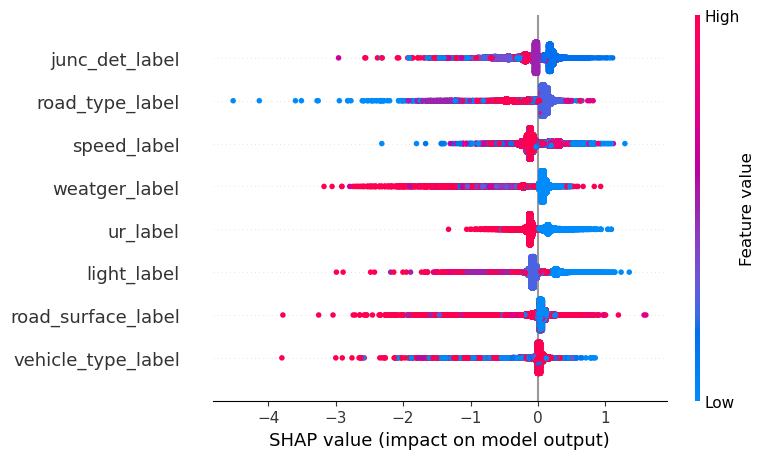

In [46]:
import shap

# 创建一个 SHAP 解释器
explainer = shap.TreeExplainer(model)

# 计算 SHAP 值
shap_values = explainer.shap_values(X_test)

# 可视化 SHAP 值
shap.summary_plot(shap_values, X_test)